In [109]:
import numpy as np
import matplotlib.pyplot as plt

UNITS - MKS

In [110]:
#Dist
m=100 #[cm]
cm=1 #[cm]
mm=1/10 #[cm]

#Force
kgf=1 #[kgf]
tf=1000 #[kgf]

#Stress
ksi=70.3*kgf/cm**2

DATA PROBLEM

In [111]:
L=245*cm
B=5*cm
H=20*cm

fy=36*ksi
Es=29000*ksi

L0=0
delta_Le=1

CALCS

In [112]:
ey=fy/Es
phi_y=2*ey/(H)
Iy=B*H**3/12
My=phi_y*Es*Iy
Le=np.arange(L0, L+delta_Le, delta_Le)
P=My/Le
P=P/1000

#Symbolic hand calculation
piv1=2*fy/(3*Es*H*Le)
piv2=3**(1/2)*Le**(1/2)*(81*Le**3-36*Le**2*L-3**(1/2)*L**(3/2)*((3*Le-2*L)/(3*Le))**(1/2)*(3*Le-2*L)**(3/2))/(4*(3*Le-2*L)**(1/2))
piv3=piv2+(np.sqrt(3)*Le**3-45*3**(1/2)*Le**3)/4
piv=piv1*((piv3/np.sqrt(3)))+piv1*Le**3
piv=piv
# print(piv[164])
# print('----------')

#Symbolic software calculation
piv4=-(Le*(11*Le**2*(3*Le-2*L)**(1/2)+Le**(1/2)*L**2+6*Le**(3/2)*L-18*Le**(5/2)))/((3*Le-2*L)**(1/2))
piv6=piv1*(piv4+Le**3)
# print(piv6[164])
# print('----------')
    
#Numerical calculation
Num_int=np.zeros_like(Le, dtype=float)
for i, Le in enumerate(Le):
    x_subarray = np.linspace(Le, L, 1000)
    y_subarray = x_subarray**2 / (1 - 2 * x_subarray / (3 * Le)) ** (3 / 2)
    Num_int[i] = np.trapz(y_subarray, x_subarray)

Num_int=piv1*(Num_int/np.sqrt(3)+Le**3)
# print(Num_int[164])

C:\Users\geova\AppData\Local\Temp\ipykernel_15908\95163673.py:6: RuntimeWarning: divide by zero encountered in divide
  P=My/Le
C:\Users\geova\AppData\Local\Temp\ipykernel_15908\95163673.py:10: RuntimeWarning: divide by zero encountered in divide
  piv1=2*fy/(3*Es*H*Le)
C:\Users\geova\AppData\Local\Temp\ipykernel_15908\95163673.py:11: RuntimeWarning: divide by zero encountered in divide
  piv2=3**(1/2)*Le**(1/2)*(81*Le**3-36*Le**2*L-3**(1/2)*L**(3/2)*((3*Le-2*L)/(3*Le))**(1/2)*(3*Le-2*L)**(3/2))/(4*(3*Le-2*L)**(1/2))
C:\Users\geova\AppData\Local\Temp\ipykernel_15908\95163673.py:11: RuntimeWarning: invalid value encountered in sqrt
  piv2=3**(1/2)*Le**(1/2)*(81*Le**3-36*Le**2*L-3**(1/2)*L**(3/2)*((3*Le-2*L)/(3*Le))**(1/2)*(3*Le-2*L)**(3/2))/(4*(3*Le-2*L)**(1/2))
C:\Users\geova\AppData\Local\Temp\ipykernel_15908\95163673.py:11: RuntimeWarning: invalid value encountered in power
  piv2=3**(1/2)*Le**(1/2)*(81*Le**3-36*Le**2*L-3**(1/2)*L**(3/2)*((3*Le-2*L)/(3*Le))**(1/2)*(3*Le-2*L)**(3/2))/

Text(0.5, 1.0, 'Load-Displacement diagram\nNumerical calculation')

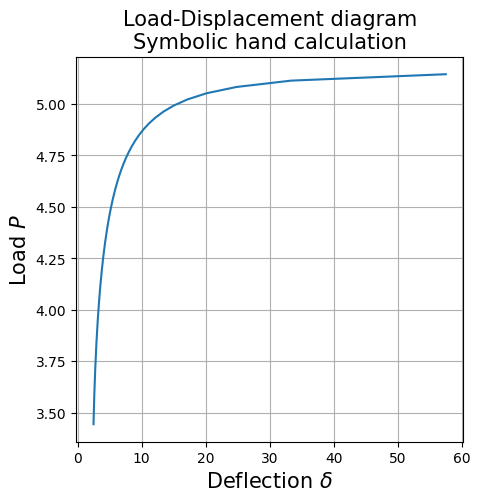

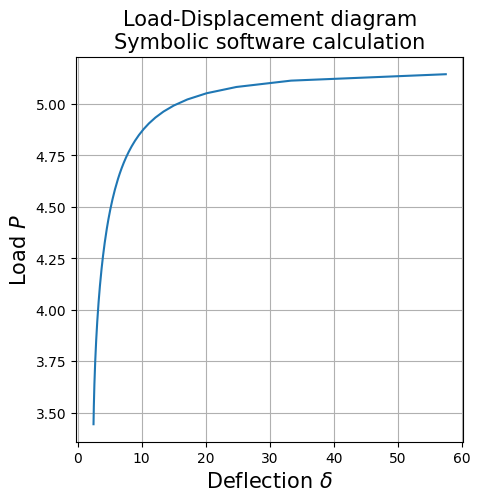

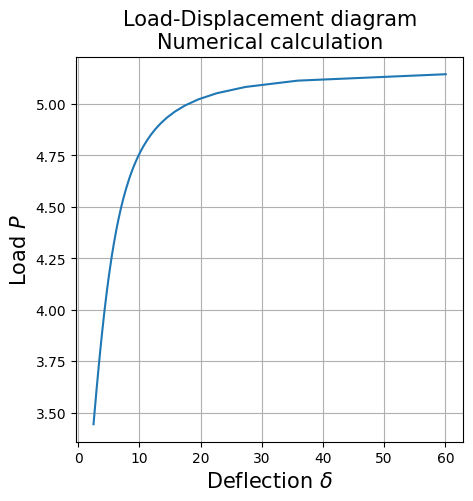

In [113]:
#Symbolic hand calculation
plt.figure(figsize=(5,5), dpi=100)
plt.plot(piv6, P)
plt.grid(True)
plt.xlabel('Deflection '+r'$\delta$', rotation=0, fontsize=15, color=(0, 0, 0))
plt.ylabel('Load '+r'$P$', rotation=90, fontsize=15, color=(0, 0, 0))
plt.title('Load-Displacement diagram\nSymbolic hand calculation', rotation=0, fontsize=15, color=(0, 0, 0))
#Symbolic software calculation
plt.figure(figsize=(5,5), dpi=100)
plt.plot(piv, P)
plt.grid(True)
plt.xlabel('Deflection '+r'$\delta$', rotation=0, fontsize=15, color=(0, 0, 0))
plt.ylabel('Load '+r'$P$', rotation=90, fontsize=15, color=(0, 0, 0))
plt.title('Load-Displacement diagram\nSymbolic software calculation', rotation=0, fontsize=15, color=(0, 0, 0))
#Numerical calculation
plt.figure(figsize=(5,5), dpi=100)
plt.plot(Num_int, P)
plt.grid(True)
plt.xlabel('Deflection '+r'$\delta$', rotation=0, fontsize=15, color=(0, 0, 0))
plt.ylabel('Load '+r'$P$', rotation=90, fontsize=15, color=(0, 0, 0))
plt.title('Load-Displacement diagram\nNumerical calculation', rotation=0, fontsize=15, color=(0, 0, 0))